In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
prng = np.random.RandomState(10)

In [4]:
from cgpm2.transition_crosscat import GibbsCrossCat

In [5]:
from cgpm2.flexible_rowmix import FlexibleRowMixture
from cgpm2.product import Product
from cgpm2.crp import CRP
from cgpm2.normal import Normal
from cgpm2.categorical import Categorical
from cgpm2.sample_crosscat import render_trace_in_embedded_dsl

### Basic univariate 3 component mixture 

In [6]:
data0 = prng.normal(loc=0, scale=2, size=20)
data1 = prng.normal(loc=30, scale=1, size=20)
data2 = prng.normal(loc=-30, scale=1, size=20)

In [7]:
data = np.concatenate((data0, data1, data2))

In [8]:
view = FlexibleRowMixture(
    cgpm_row_divide=CRP([-1], [], rng=prng),
    cgpm_components_base=Product(cgpms=[Normal([0], [], rng=prng)]),
    rng=prng)
crosscat = Product(cgpms=[view])

In [9]:
for rowid, value in enumerate(data):
    crosscat.incorporate(rowid, {0: value})

In [10]:
embedded_dsl = render_trace_in_embedded_dsl(crosscat)
print embedded_dsl.getvalue()

from cgpm2.categorical import Categorical
from cgpm2.crp import CRP
from cgpm2.flexible_rowmix import FlexibleRowMixture
from cgpm2.normal import Normal
from cgpm2.poisson import Poisson
from cgpm2.product import Product

nan = float('nan')

view0 = FlexibleRowMixture(
  cgpm_row_divide=CRP(outputs=[-1], inputs=[], hypers={'alpha': 1},),
  cgpm_components_base=Product(cgpms=[
    Normal(outputs=[0], inputs=[], hypers={'s': 1, 'r': 1, 'm': 0, 'nu': 1},),])
)
crosscat = Product(cgpms=[view0])

# Incorporates for view 0.
crosscat.incorporate(0, {0: 2.663173008259036, -1: 0})
crosscat.incorporate(1, {0: 1.430557948796811, -1: 0})
crosscat.incorporate(2, {0: -3.0908005842225363, -1: 0})
crosscat.incorporate(3, {0: -0.016767699857044512, -1: 0})
crosscat.incorporate(4, {0: 1.242671947780961, -1: 0})
crosscat.incorporate(5, {0: -1.4401711214377937, -1: 0})
crosscat.incorporate(6, {0: 0.531023171384239, -1: 0})
crosscat.incorporate(7, {0: 0.21709705142993888, -1: 0})
crosscat.incorporate(8, {0

In [11]:
inference = GibbsCrossCat(crosscat, prng)
inference.transition_structure_cpp(N=1000)

Completed: 1000 iterations in 7.124316 seconds.


In [12]:
embedded_dsl = render_trace_in_embedded_dsl(inference.crosscat).getvalue()
print embedded_dsl

from cgpm2.categorical import Categorical
from cgpm2.crp import CRP
from cgpm2.flexible_rowmix import FlexibleRowMixture
from cgpm2.normal import Normal
from cgpm2.poisson import Poisson
from cgpm2.product import Product

nan = float('nan')

view0 = FlexibleRowMixture(
  cgpm_row_divide=CRP(outputs=[4034473124], inputs=[], hypers={'alpha': 0.4937},),
  cgpm_components_base=Product(cgpms=[
    Normal(outputs=[0], inputs=[], hypers={'s': 362.0648, 'r': 0.0167, 'm': -12.0913, 'nu': 1},),])
)
crosscat = Product(cgpms=[view0])

# Incorporates for view 0.
crosscat.incorporate(40, {0: -29.339768448773686, 4034473124: 0})
crosscat.incorporate(41, {0: -30.350871891439873, 4034473124: 0})
crosscat.incorporate(42, {0: -30.93943335976255, 4034473124: 0})
crosscat.incorporate(43, {0: -30.489337216884653, 4034473124: 0})
crosscat.incorporate(44, {0: -30.804591142269956, 4034473124: 0})
crosscat.incorporate(45, {0: -30.212697638710512, 4034473124: 0})
crosscat.incorporate(46, {0: -30.339140246063433,

In [13]:
exec(embedded_dsl)

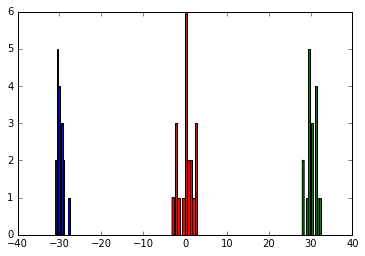

In [14]:
assignments = crosscat.cgpms[0].cgpm_row_divide.data
counts = crosscat.cgpms[0].cgpm_row_divide.counts
fig, ax = plt.subplots()
for cluster in counts:
    rowids = [rowid for rowid, z in assignments.iteritems() if z == cluster]
    ax.hist(data[rowids])

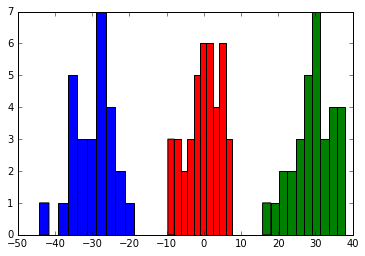

In [15]:
crp_output = crosscat.cgpms[0].cgpm_row_divide.outputs[0]
samples = crosscat.simulate(None, [crp_output,0], N=100)
fig, ax = plt.subplots()
zs = set([s[crp_output] for s in samples])
for z in zs:
    xs = [s[0] for s in samples if s[crp_output] == z]
    ax.hist(xs)

In [16]:
inference = GibbsCrossCat(crosscat, rng=prng)
inference.transition(N=100, kernels=['hypers_distributions','hypers_row_divide'])

Completed: 100 iterations in 0.913152 seconds.


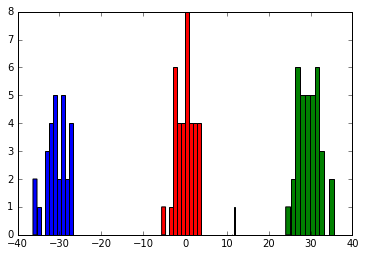

In [17]:
crp_output = inference.crosscat.cgpms[0].cgpm_row_divide.outputs[0]
samples = inference.crosscat.simulate(None, [crp_output,0], N=100)
fig, ax = plt.subplots()
zs = set([s[crp_output] for s in samples])
for z in zs:
    xs = [s[0] for s in samples if s[crp_output] == z]
    ax.hist(xs)

### Basic bivariate 2 component mixture with CrossCat and category inference and nominal variable

In [18]:
df = pd.read_csv('resources/two_clusters.csv', index_col=False)

In [19]:
df.loc[0,'x'] = df.loc[50,'y'] = np.nan
df.loc[10,'x'] = df.loc[30,'y'] = np.nan
df.loc[33,'x'] = df.loc[33,'y'] = np.nan

In [20]:
df['z'] = 0
df.loc[:15,'z'] = 0
df.loc[15:30,'z'] = 1
df.loc[30:45,'z'] = 2
df.loc[45:60,'z'] = 3

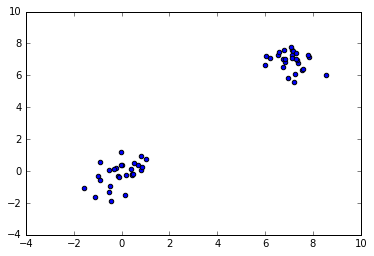

In [21]:
fig, ax = plt.subplots()
ax.scatter(df.x, df.y)

In [22]:
crosscat = Product([
    FlexibleRowMixture(
        cgpm_row_divide=CRP([-1], [], rng=prng),
        cgpm_components_base=Product([
            Normal([10], [], rng=prng),
        ]),
        rng=prng),
    FlexibleRowMixture(
        cgpm_row_divide=CRP([-2], [], rng=prng),
        cgpm_components_base=Product([
            Normal([11], [], rng=prng),
            Categorical([50], [], distargs={'k':4}, rng=prng),
        ]),
        rng=prng),
])

In [23]:
for rowid, row in df.iterrows():
    crosscat.incorporate(rowid, {10: row.x, 11: row.y, 50:row.z})

In [24]:
embedded_dsl = render_trace_in_embedded_dsl(crosscat).getvalue()
print embedded_dsl

from cgpm2.categorical import Categorical
from cgpm2.crp import CRP
from cgpm2.flexible_rowmix import FlexibleRowMixture
from cgpm2.normal import Normal
from cgpm2.poisson import Poisson
from cgpm2.product import Product

nan = float('nan')

view0 = FlexibleRowMixture(
  cgpm_row_divide=CRP(outputs=[-1], inputs=[], hypers={'alpha': 1},),
  cgpm_components_base=Product(cgpms=[
    Normal(outputs=[10], inputs=[], hypers={'s': 1, 'r': 1, 'm': 0, 'nu': 1},),])
)
view1 = FlexibleRowMixture(
  cgpm_row_divide=CRP(outputs=[-2], inputs=[], hypers={'alpha': 1},),
  cgpm_components_base=Product(cgpms=[
    Normal(outputs=[11], inputs=[], hypers={'s': 1, 'r': 1, 'm': 0, 'nu': 1},),
    Categorical(outputs=[50], inputs=[], distargs={'k': 4}, hypers={'alpha': 1},),])
)
crosscat = Product(cgpms=[view0, view1])

# Incorporates for view 0.
crosscat.incorporate(0, {10: nan, -1: 0})
crosscat.incorporate(1, {10: 0.7969081275921855, -1: 0})
crosscat.incorporate(3, {10: -1.1102675350407265, -1: 1})
crossca

In [25]:
inference = GibbsCrossCat(crosscat, prng)
inference.transition_structure_cpp(N=2000)

Completed: 2000 iterations in 17.496127 seconds.


In [26]:
embedded_dsl = render_trace_in_embedded_dsl(inference.crosscat).getvalue()
print embedded_dsl

from cgpm2.categorical import Categorical
from cgpm2.crp import CRP
from cgpm2.flexible_rowmix import FlexibleRowMixture
from cgpm2.normal import Normal
from cgpm2.poisson import Poisson
from cgpm2.product import Product

nan = float('nan')

view0 = FlexibleRowMixture(
  cgpm_row_divide=CRP(outputs=[3118254485], inputs=[], hypers={'alpha': 0.6547},),
  cgpm_components_base=Product(cgpms=[
    Normal(outputs=[10], inputs=[], hypers={'s': 10.1385, 'r': 0.0306, 'm': 6.2461, 'nu': 1.3216},),
    Normal(outputs=[11], inputs=[], hypers={'s': 7.4421, 'r': 0.0306, 'm': 10.2671, 'nu': 16.2535},),
    Categorical(outputs=[50], inputs=[], distargs={'k': 4}, hypers={'alpha': 0.1203},),])
)
crosscat = Product(cgpms=[view0])

# Incorporates for view 0.
crosscat.incorporate(30, {50: 2, 10: 6.466560100208097, 11: nan, 3118254485: 0})
crosscat.incorporate(31, {50: 2, 10: 7.362696154290371, 11: 6.789216534875745, 3118254485: 0})
crosscat.incorporate(32, {50: 2, 10: 7.345434494149347, 11: 6.9465627292569

In [27]:
exec(embedded_dsl)

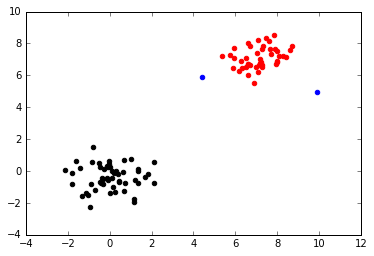

In [28]:
crp_output = crosscat.cgpms[0].cgpm_row_divide.outputs[0]
samples = crosscat.simulate(None, [crp_output,10,11], N=100)
fig, ax = plt.subplots()
zs = set([s[crp_output] for s in samples])
for z, c in zip(zs, ['r','k','b','g']):
    xs = [s[10] for s in samples if s[crp_output] == z]
    ys = [s[11] for s in samples if s[crp_output] == z]
    ax.scatter(xs,ys, color=c)

/usr/lib/python2.7/dist-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


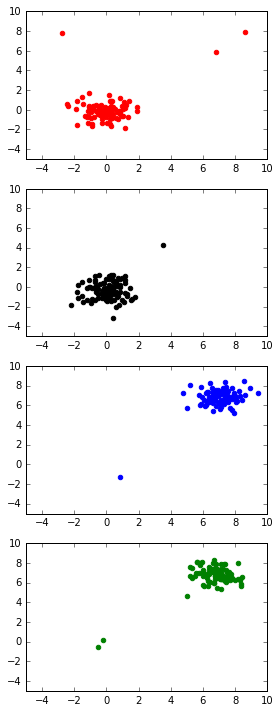

In [29]:
fig, axes = plt.subplots(nrows=4)
for ax, z, c in zip(axes, [0,1,2,3], ['r','k','b','g']):
    samples = crosscat.simulate(None, [10,11], {50:z}, N=100)
    xs = [s[10] for s in samples]
    ys = [s[11] for s in samples]
    ax.scatter(xs,ys, color=c)
    ax.set_xlim([-5,10])
    ax.set_ylim([-5,10])
fig.set_size_inches(4,10)
fig.set_tight_layout(True)

In [30]:
print np.exp(crosscat.cgpms[0].cgpm_components_array.cgpms[0].cgpms[2].logpdf(None, {50:0}))
print np.exp(crosscat.cgpms[0].cgpm_components_array.cgpms[0].cgpms[2].logpdf(None, {50:1}))
print np.exp(crosscat.cgpms[0].cgpm_components_array.cgpms[0].cgpms[2].logpdf(None, {50:2}))
print np.exp(crosscat.cgpms[0].cgpm_components_array.cgpms[0].cgpms[2].logpdf(None, {50:3}))

0.003946695012007402
0.003946695012007402
0.49605330498799266
0.49605330498799266


In [31]:
inference = GibbsCrossCat(crosscat, prng)
inference.transition(N=100, kernels=['hypers_row_divide', 'hypers_distributions'])

Completed: 100 iterations in 1.720478 seconds.


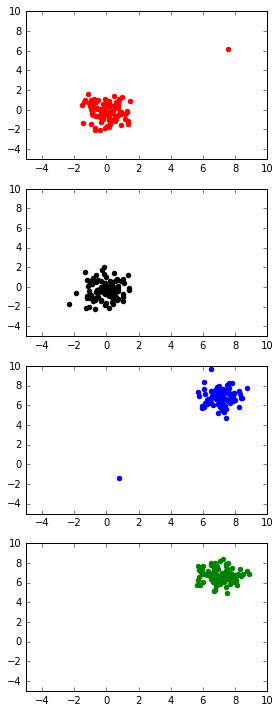

In [32]:
fig, axes = plt.subplots(nrows=4)
for ax, z, c in zip(axes, [0,1,2,3], ['r','k','b','g']):
    samples = inference.crosscat.simulate(None, [10,11], {50:z}, N=100)
    xs = [s[10] for s in samples]
    ys = [s[11] for s in samples]
    ax.scatter(xs,ys, color=c)
    ax.set_xlim([-5,10])
    ax.set_ylim([-5,10])
fig.set_size_inches(4,10)
fig.set_tight_layout(True)

#### Good test (move me) to ensure that we cannot incorpoate 677109989 into cluster 10

In [33]:
from cgpm2.categorical import Categorical
from cgpm2.crp import CRP
from cgpm2.flexible_rowmix import FlexibleRowMixture
from cgpm2.normal import Normal
from cgpm2.poisson import Poisson
from cgpm2.product import Product

nan = float('nan')

view0 = FlexibleRowMixture(
  cgpm_row_divide=CRP(outputs=[677109989], inputs=[], hypers={'alpha': 0.6547},),
  cgpm_components_base=Product(cgpms=[
    Normal(outputs=[10], inputs=[], hypers={'s': 10.1385, 'r': 0.0306, 'm': 6.2461, 'nu': 1.3216},),
    Normal(outputs=[11], inputs=[], hypers={'s': 7.4421, 'r': 0.0306, 'm': 10.2671, 'nu': 16.2535},),
    Categorical(outputs=[50], inputs=[], distargs={'k': 4}, hypers={'alpha': 1},),])
)
crosscat = Product(cgpms=[view0])

In [34]:
# Incorporates for view 0.
try:
    crosscat.incorporate(30, {50: 2, 10: 6.466560100208097, 11: nan, 677109989: 10})
    raise ValueError('Failed to fail!')
except AssertionError:
    pass